In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/divvytripdata2021/202110-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202105-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202109-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202111-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202107-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202108-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202106-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202101-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202103-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202104-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202102-divvy-tripdata.csv
/kaggle/input/divvytripdata2021/202112-divvy-tripdata.csv


# Cyclistic Bike Share - Exploratory Data Analysis

#### ABOUT THE COMPANY

Founded in 2016, Cyclistic is a bike-share program that features more than 5,800 bicycles and 600 docking stations. In addition to offering traditional bikes, the company also has reclining bikes, hand tricycles, and cargo bikes included in its renting options. They can be unlocked from one station and returned to any other station in the system anytime.

Cyclistic has flexible pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders while customers who purchase annual memberships are known as members.

The company's finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps the company attract more customers, Lily Moreno – Cyclistic's marketing director – believes that maximizing the number of annual members will be key to future growth. Instead of creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members.

#### STAKEHOLDERS


- **Lily Moreno** – Cyclistic’s marketing director.

- **Cyclistic marketing analytics team** – A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide the company’s marketing strategy.

- **Cyclistic executive team** – Responsible for deciding whether to approve the recommended marketing program.

# BUSINESS TASK - ASK

This project aims to Design a new marketing strategy that will encourage more casual riders to become annual members.
The key tasks are:
- Analyze how casual riders and annual members use Cyclistic bikes differently.
- Marketing strategy for maximizing the number of annual memberships.


# PREPARE

#### Data Sources
Dataset Used: divvytripdata2021(Jan - Dec)
2021 Dataset link - https://divvy-tripdata.s3.amazonaws.com/index.html
License - The data has been made available by Motivate International Inc. under this https://www.divvybikes.com/data-license-agreement

The datasets are named differently because Cyclistic is a fictional company. **Divvy**, the name you will see on the files, is a real bike-share system in Chicago with over 600 stations and 6,000+ bikes across the city.

# PROCESS

We will begin this phase by loading the libraries and datasets. Then, we will perform data exploration by getting an overview of the datasets, checking the data types, and cleaning the data.

 Loading Python Libraries

In [85]:
# Loading Python Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.api.types import CategoricalDtype
from datetime import datetime as dt

Loading Datasets


In [86]:


df1 = pd.read_csv("/kaggle/input/divvytripdata2021/202101-divvy-tripdata.csv")
df2= pd.read_csv('/kaggle/input/divvytripdata2021/202102-divvy-tripdata.csv')
df3= pd.read_csv('/kaggle/input/divvytripdata2021/202103-divvy-tripdata.csv')
df4= pd.read_csv('/kaggle/input/divvytripdata2021/202104-divvy-tripdata.csv')
df5 = pd.read_csv('/kaggle/input/divvytripdata2021/202105-divvy-tripdata.csv')
df6 = pd.read_csv('/kaggle/input/divvytripdata2021/202106-divvy-tripdata.csv')
df7 = pd.read_csv('/kaggle/input/divvytripdata2021/202107-divvy-tripdata.csv')
df8= pd.read_csv('/kaggle/input/divvytripdata2021/202108-divvy-tripdata.csv')
df9 = pd.read_csv('/kaggle/input/divvytripdata2021/202109-divvy-tripdata.csv')
df10 = pd.read_csv('/kaggle/input/divvytripdata2021/202110-divvy-tripdata.csv')
df11 = pd.read_csv('/kaggle/input/divvytripdata2021/202111-divvy-tripdata.csv')
df12 = pd.read_csv('/kaggle/input/divvytripdata2021/202112-divvy-tripdata.csv')

Combining Datasets 

In [87]:


df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis = 0)

## Discovering Dataset

* shape
* info
* Statistical description
* Dataframe 

In [88]:
# Discovering Data

df.shape

(5595063, 13)

In [89]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


In [90]:
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.7200,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.6900,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.7000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.6900,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.7000,casual
5,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,NaN,NaN,41.900409,-87.696763,41.940000,-87.7100,casual
6,09275CC10F854E9E,electric_bike,2021-01-04 05:05:04,2021-01-04 05:10:39,California Ave & Cortez St,17660,NaN,NaN,41.900391,-87.696757,41.900000,-87.7100,member
7,DF7A32A217AEFB14,electric_bike,2021-01-14 15:07:00,2021-01-14 15:13:40,California Ave & Cortez St,17660,NaN,NaN,41.900390,-87.696728,41.910000,-87.7000,member
8,C2EFC62379EB716C,electric_bike,2021-01-09 09:57:55,2021-01-09 10:00:26,California Ave & Cortez St,17660,NaN,NaN,41.900306,-87.696796,41.900000,-87.7000,member
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.6722,member


In [91]:
df.describe(include= 'all')


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,5595063,5595063,5595063,5595063,4904254,4904257,4855893,4855893,5.595063e+06,5.595063e+06,5.590292e+06,5.590292e+06,5595063
unique,5595063,3,4677998,4671372,847,834,844,832,NaN,NaN,NaN,NaN,2
top,E19E6F1B8D4C42ED,classic_bike,2021-07-16 16:59:57,2021-09-16 08:39:10,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,NaN,NaN,NaN,NaN,member
freq,1,3251028,7,17,82715,82715,83390,83390,NaN,NaN,NaN,NaN,3066058
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190107e+01,-8.764605e+01,4.190134e+01,-8.764626e+01,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.608635e-02,2.872111e-02,4.618916e-02,2.889959e-02,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.188155e+01,-8.766000e+01,4.188184e+01,-8.766000e+01,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.189897e+01,-8.764182e+01,4.189964e+01,-8.764275e+01,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.192914e+01,-8.762773e+01,4.192920e+01,-8.762775e+01,NaN


## Converting Datatypes

- Columns like 'started at' and 'ended at' into datetime datatype.
- Columns like 'member casual' and 'rideable type' into category datatype.

In [92]:
df['started_at']=pd.to_datetime(df['started_at'])
df['ended_at']=pd.to_datetime(df['ended_at'])


In [93]:
df['member_casual'] = df['member_casual'].astype('category')
df['rideable_type'] = df['rideable_type'].astype('category')

df.dtypes

ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual               category
dtype: object

## Structuring Dataset

- Creating 'weekday' Column to identify which day of the week.
- Creating 'Month' Column to identify Bike usage on different months.
- Creating 'Hour' Column to identify Bike rode at different hour.
- Creating 'Day' Column to identify whether the given day is weekday or weekend.
- Creating 'Trip Duration' Column to identify for how long the bike was used.

In [94]:

df['weekday'] = df['started_at'].dt.strftime('%A')
df['month']= df['started_at'].dt.strftime('%b')
df['hour']= df['started_at'].dt.strftime('%H')



In [95]:
#creating trip duration column
weekday = ['Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday']
df["day"] = df["weekday"].apply(lambda x: 'Weekday' if x in weekday else 'Weekend')
df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,weekday,month,hour,day
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,Saturday,Jan,16,Weekend
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,Wednesday,Jan,18,Weekday


In [96]:
df['trip_duration'] = df['ended_at'] - df['started_at']
df['trip_duration'] = (df['trip_duration'].dt.total_seconds()/60).round()

df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,weekday,month,hour,day,trip_duration
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,Saturday,Jan,16,Weekend,10.0
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,Wednesday,Jan,18,Weekday,4.0


In [97]:
df['hour'] = pd.to_numeric(df['hour'], errors='coerce')
df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,weekday,month,hour,day,trip_duration
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,Saturday,Jan,16,Weekend,10.0
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,Wednesday,Jan,18,Weekday,4.0


In [98]:

fig2 = df.groupby(['month','member_casual'])['ride_id'].count().to_frame().reset_index()

fig2.head(2)

,month,member_casual,ride_id
0,Apr,casual,136601
1,Apr,member,200629


## Cleaning dataset

- Checking for any duplicate data.
- Checking for any missing values.
- Dropping any missing value. 
- Resetting index.

In [99]:

df.duplicated().sum()

0

In [100]:

df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
weekday                    0
month                      0
hour                       0
day                        0
trip_duration              0
dtype: int64

In [101]:
df = df.dropna()
df= df.reset_index(drop = True)

## Finding Outliers in 'trip duration' column

Text(0.5, 1.0, 'Yearly Trip Duration')

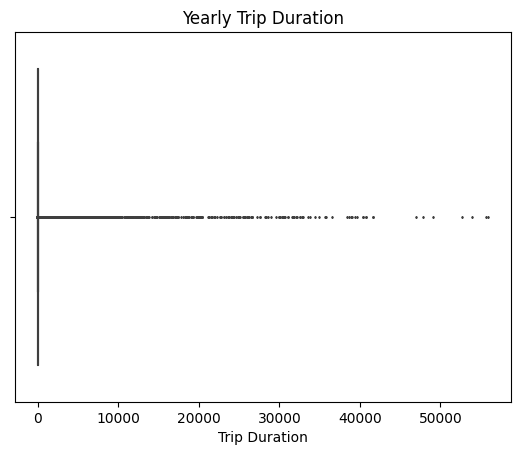

In [102]:
box = sns.boxplot(x = df['trip_duration'], fliersize = 1)
plt.xlabel('Trip Duration')
plt.title('Yearly Trip Duration')

In [103]:
percentile25 = df['trip_duration'].quantile(0.25)
percentile95 = df['trip_duration'].quantile(0.95)
iqr = percentile95-percentile25

In [104]:
upper_limit = percentile95 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('lower limit is: ', lower_limit)
print(df[df['trip_duration']< lower_limit])
mask = (df['trip_duration']>= lower_limit)&(df['trip_duration']<=upper_limit)
df = df[mask].copy()
df= df.reset_index(drop = True)
df.head(2)

lower limit is:  -69.5
Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual, weekday, month, hour, day, trip_duration]
Index: []


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,weekday,month,hour,day,trip_duration
0,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.67220,member,Sunday,Jan,19,Weekend,7.0
1,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.69689,member,Saturday,Jan,12,Weekend,5.0


# ANALYZE

- Count of each member type.
- Count of Riders using bikes per month.
- Count Of Riders using bikes per day.
- Count Of Riders using bikes per hour.
- Count Of Riders using bikes Per Hour of The Week.
- How Riders Use Bike On Different Days - weekday and weekend.
- How long different members use bikes on an average.

In [105]:
fig1 =df.groupby(['member_casual'])['ride_id'].count().to_frame().reset_index()
fig1

,member_casual,ride_id
0,casual,2009086
1,member,2537023


In [106]:
fig2 = df.groupby(['weekday','member_casual'])['ride_id'].count().to_frame().reset_index()
fig2.head()

,weekday,member_casual,ride_id
0,Friday,casual,285410
1,Friday,member,365387
2,Monday,casual,224517
3,Monday,member,346156
4,Saturday,casual,458077


In [107]:
fig3 = df.groupby(['weekday','hour'])['ride_id'].count().to_frame().reset_index()
fig3

,weekday,hour,ride_id
0,Friday,0,7884
1,Friday,1,4711
2,Friday,2,2360
3,Friday,3,1322
4,Friday,4,1441
...,...,...,...
163,Wednesday,19,45525
164,Wednesday,20,30962
165,Wednesday,21,24280
166,Wednesday,22,18003


In [108]:
fig4 = df.groupby([ 'hour', 'day'])['ride_id'].count().to_frame().reset_index()
fig4.head()

,hour,day,ride_id
0,0,Weekday,26192
1,0,Weekend,40547
2,1,Weekday,14196
3,1,Weekend,32244
4,2,Weekday,7758


# SHARE

- Now we are going to present our findings through various visualization.

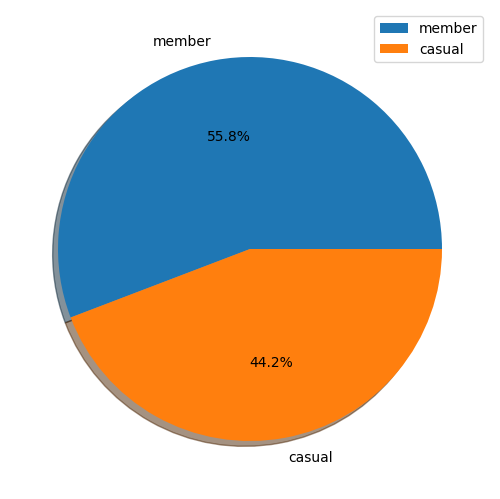

In [118]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
members = ['member', 'casual']
count = [2537023, 2009086]
ax.pie(count, labels = members, autopct='%1.1f%%', shadow = True)
plt.legend()
plt.show()

This pie chart shows us that annual members represent the majority of Cyclistic's bike-sharing system users, making up for 55.8% of total users.

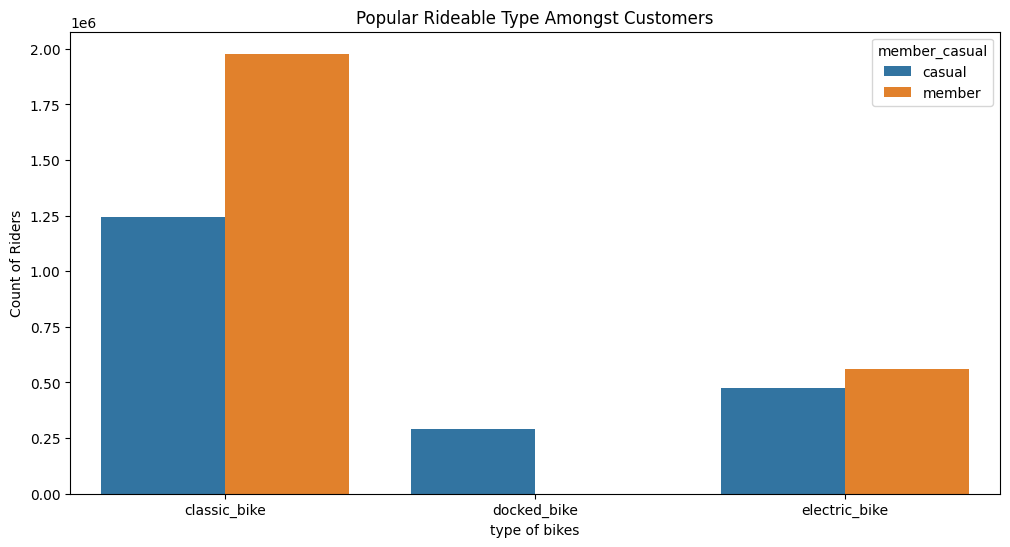

In [119]:
fig,ax = plt.subplots(figsize = (12, 6))
sns.countplot(data = df , x = 'rideable_type', hue = 'member_casual')
plt.xlabel('type of bikes')
plt.ylabel('Count of Riders')
plt.title('Popular Rideable Type Amongst Customers')
plt.show()

According to our dataset, Cyclistic's bikes are divided into three groups: classic bike, docked bike, and electric bike. It is clear in the visualization that classic bike is the most rented rideable type by both casual riders and members. This could either be explained by the users showing a preference for the classic type.

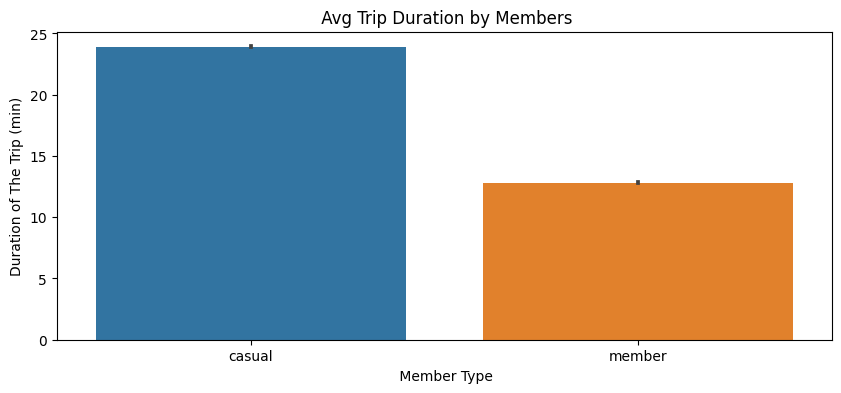

In [111]:
df['trip_duration'] = df['trip_duration'].astype(float)
fig, ax = plt.subplots(figsize = (10, 4))
sns.barplot(data=df, x='member_casual', y='trip_duration')
plt.xlabel(" Member Type")
plt.ylabel("Duration of The Trip (min)")
plt.title(" Avg Trip Duration by Members")
plt.show()

The bar chart above shows us that casual bikers rides the bike on an average more than the member. The average ride length is approximately  24 minutes for casual riders and approximately 12 minutes for members.

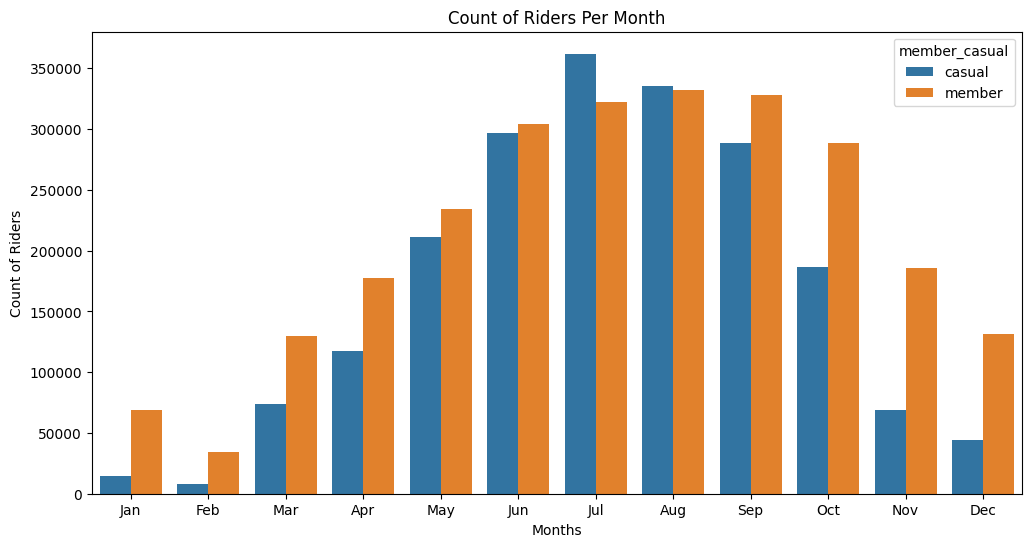

In [112]:
fig,ax = plt.subplots(figsize = (12,6))
sns.countplot(data = df, x = 'month', hue = 'member_casual')
plt.xlabel('Months')
plt.ylabel('Count of Riders')
plt.title('Count of Riders Per Month')
plt.show()

Visualizing the count of rides per month can help us learn if seasonality plays a role in bike rental. The chart above shows us that the number of rentals increases during the summer months and gradually drops over the fall and winter for both user types. The main difference is that members are still more consistent with their rental habits throughout the year when compared to casual riders, whose numbers drop significantly during the winter months.

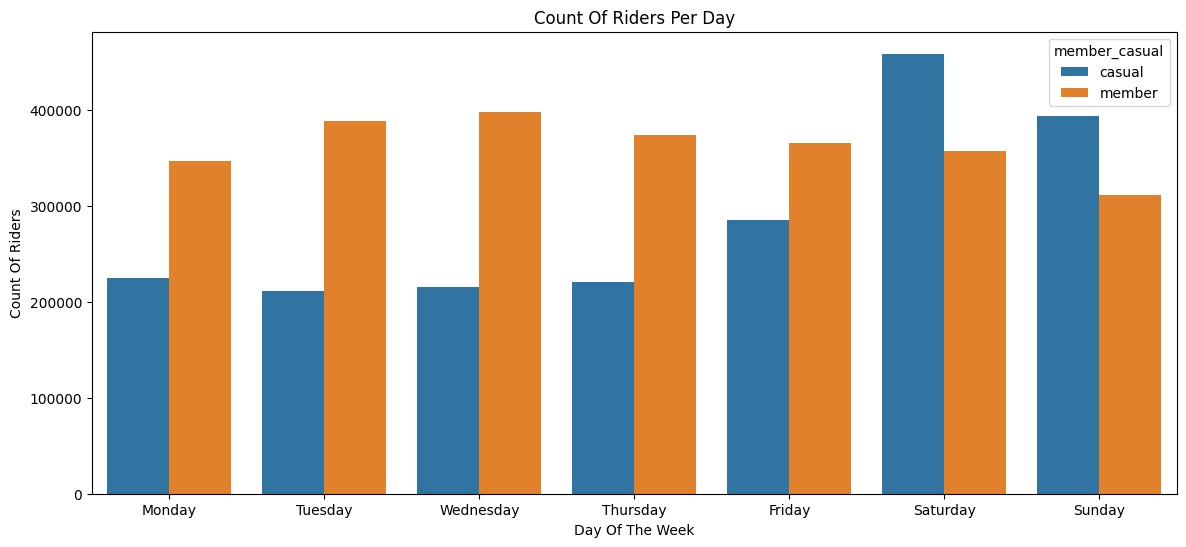

In [120]:
fig, ax = plt.subplots(figsize = (14, 6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data = df, x = 'weekday', hue = 'member_casual', order=weekday_order)
plt.xlabel('Day Of The Week')
plt.ylabel('Count Of Riders')
plt.title('Count Of Riders Per Day')
plt.show()

When it comes to bike rentals by day of the week. The two groups differ considerably, when it comes to bike rentals throughout the weekdays: members consistently rent bikes on a daily basis while casual riders are less active on weekdays as compared to the weekend.

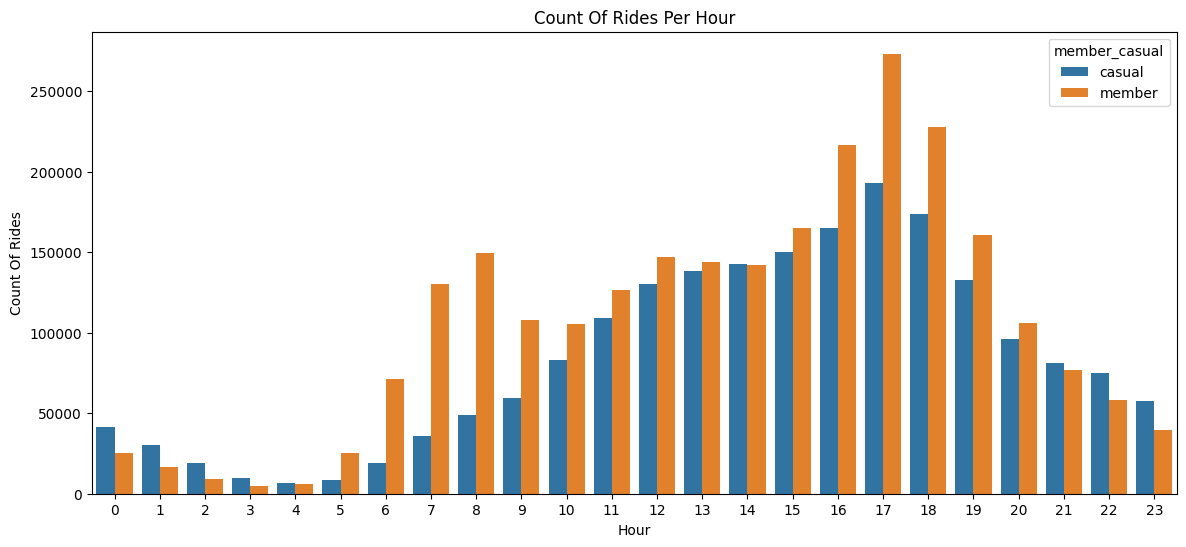

In [121]:
df5 = df[['hour', 'member_casual', 'ride_id']]
df5 = df5.groupby(['hour', 'member_casual'], as_index=False)[['ride_id']].count()

fig, ax = plt.subplots(figsize = (14, 6))
sns.barplot(data = df5, x = 'hour', y = 'ride_id' ,hue = 'member_casual')
plt.xlabel('Hour')
plt.ylabel('Count Of Rides')
plt.title('Count Of Rides Per Hour')
plt.show()

By taking a closer look into the total number of rides per hour, we can find more patterns in the customers' bike rental habits. The number of bike rentals by casual riders begins to increase between 8 am and 10 am, peaking at 5 pm. As for members, the numbers start to go up earlier – between 6 am and 7 am – also peaking at 5 pm. Note that the number of rides by members is far greater than casual riders. This could be related to the fact that members represent the majority of users and likely use Cyclistic's services for their daily commute.

Text(0.5, 1.0, 'How Riders Use Bike On Different Days')

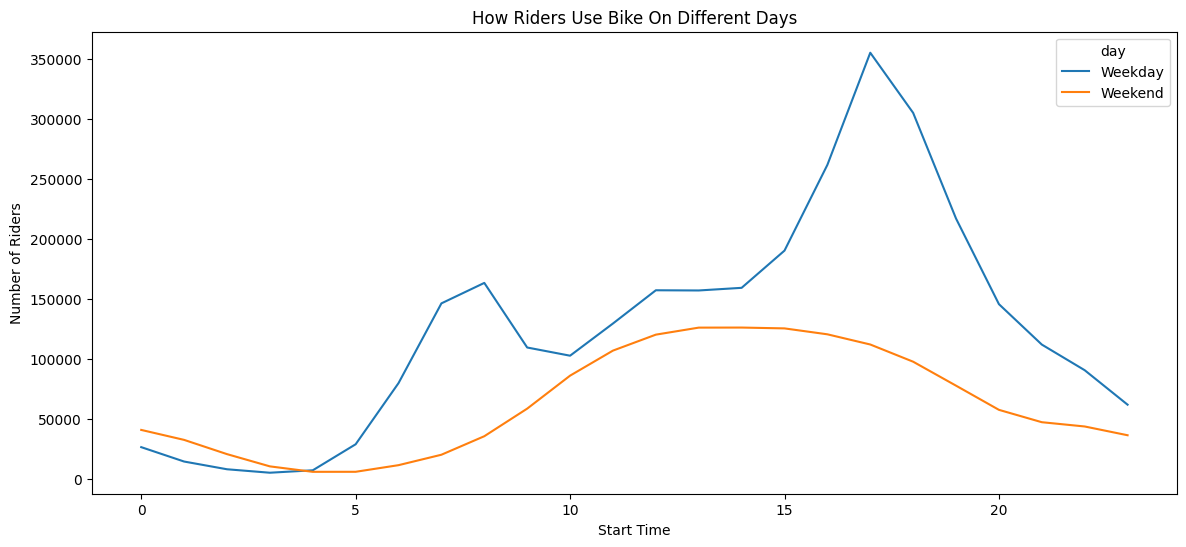

In [115]:
fig, ax = plt.subplots(figsize = (14, 6))
sns.lineplot(data = fig4, x = 'hour', y = 'ride_id', hue = 'day')
plt.xlabel("Start Time")
plt.ylabel("Number of Riders")
plt.title('How Riders Use Bike On Different Days')

In this line chart, It clearly shows the how riders utilize the bikes per day of the week. It clearly shows the activity is at it's peak during weekdays where as comparatively fewer customers tend to use the bike rental service on the weekends. It is important to note that on the weekdays most of our members tend to use the bike either early in the morning or between 4pm to 7pm whereas on weekends although fewer customers use the bikes but the duration is much longer  that is between 10am to 7pm after which it starts to drop for both - weekdays and weekends.

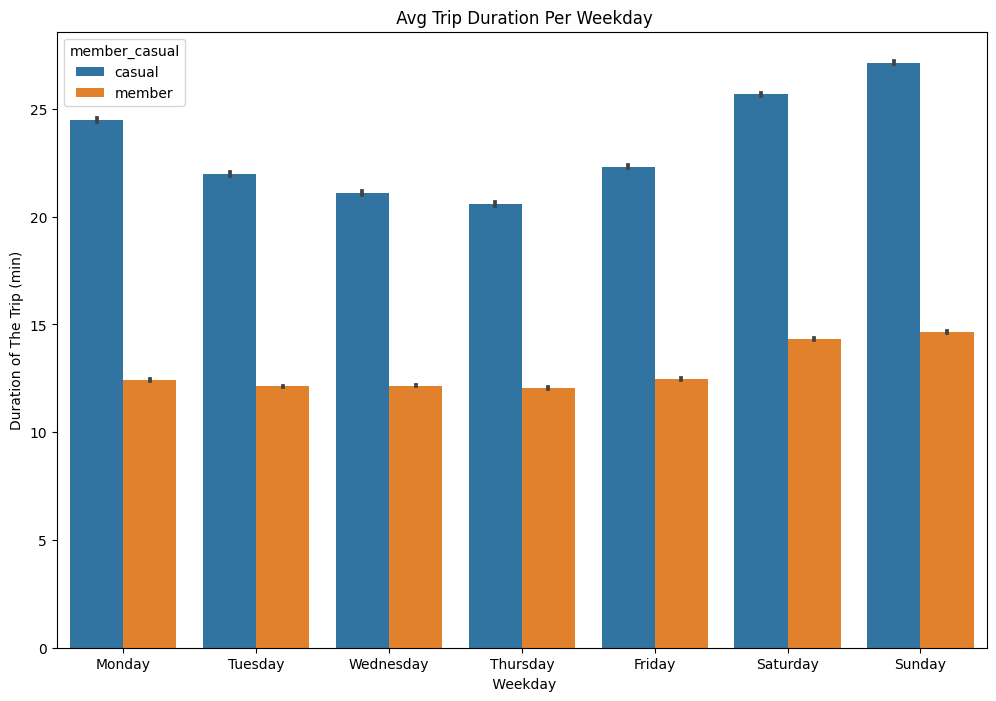

In [116]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.barplot(data = df, x = 'weekday', y = 'trip_duration', hue = 'member_casual', order = week_order)
plt.xlabel(" Weekday")
plt.ylabel("Duration of The Trip (min)")
plt.title(" Avg Trip Duration Per Weekday")
plt.show()

On this bar plot, it becomes clear that ride length increases on the weekends for the two groups. The difference between casual riders and members in this scenario lies in the duration of rides. Casual riders tend to take longer rides In contrast to members.

Considering the lack of personal user data for privacy reasons, it is difficult for us to determine exactly what causes casual riders and members to have such different trip duration. It is likely that members live close to work/school and choose to commute using Cyclistic's bike-sharing system. As for casual riders, if we take into consideration that they purchase either single-ride or full-day passes, this makes them less likely to use the service on a daily basis as members do. Casual riders could have longer ride lengths because they are using it for leisure or tourism.

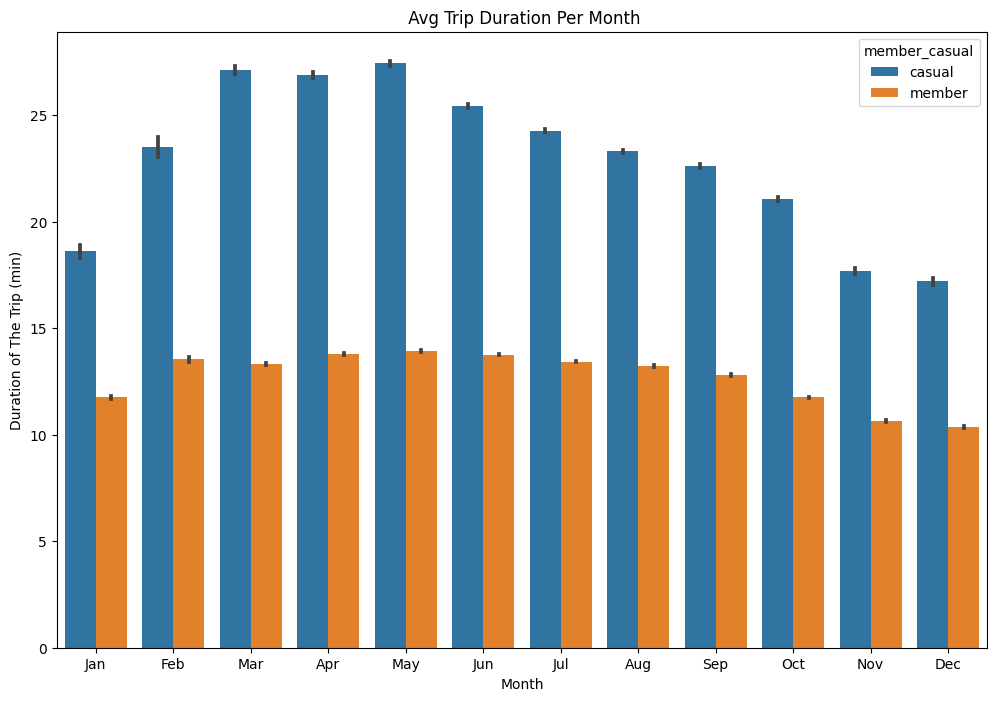

In [117]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.barplot(data = df, x = 'month', y = 'trip_duration', hue = 'member_casual')
plt.xlabel("Month")
plt.ylabel("Duration of The Trip (min)")
plt.title(" Avg Trip Duration Per Month")
plt.show()

When we visualize trip duration by month, we can learn more about the user's riding habits throughout the year. Trip duration changes considerably for casual riders as the months go by. For casual riders, the trip duration peaks during the summer – reaching an average of 28 minutes in May – before dropping from August. As for the members, the ride length does not change drastically over the months therefore the avg time spent is in the range 10-15 min.

Considering the short trips, this could indicate that members use Cyclistic's bikes to commute and, perhaps, run errands. The drop in ride length over the winter months could indicate that members choose other means of transportation to commute during that time of the year. In contrast, casual riders could be using it for leisure or tourism – as mentioned earlier – especially during the spring and summer.

# ACT

Now, it is time to summarize our key findings and present our recommendations for Cyclistic's marketing team.



### Key Findings

- Annual members are the majority of users, making up for 55.8% of Cyclistic's customers.
- Casual riders have an average ride length of 24 minutes while members take shorter trips, averaging 12 minutes.
- Classic bike is the most popular rideable type for both groups.
- Saturday and Sunday are the most popular days of the week for bike rentals.
- Casual riders, as well as members, take longer rides on the weekends.
- Members consistently rent bikes on a daily basis while casual riders present lower weekday numbers compared to the weekend.
- Both user types utilize the bike most during the spring and summer months.
- Average trip duration combined with the average time of day rentals indicates that members use Cyclistic's bikes to go to work/school. The noticeable drop in ride length over the winter could be related to a change in means of transportation to commute during that time of year.


#### **After conducting analysis with the support of visualizations, it became clear how casual riders and members use Cyclistic bikes differently:**

- Knowing that the most of the casual riders take longer trips on weekends during summer suggests that they are using the single-ride and full-day passes for leisure or tourism.
- Members tend to use Cyclistic's bike-sharing system on a daily basis for shorter rides, indicating they might use it for commuting to work/school or might be for running errands on the weekends.

## Recommendations

The following recommendations were carefully created to help guide Cyclistic's marketing strategy:

- Increase marketing campaign targeted at casual riders through email, text messages, and app notifications during the summer months, when bike rental is more frequent. The ads could offer special discounts for the annual membership in order to encourage casual riders to make the switch.

- Create a rewards points system for members, where each bike rental adds up a certain number of points to the user’s account. The points could get higher with rental frequency and trip duration, and at the end of each year, the user could exchange the points for a discount on membership renewal.

- Given that casual riders do not rent bikes as much as members during the weekdays, Cyclistic’s marketing team should also consider the possibility of creating two new types of membership:

     - An annual membership that only includes the weekends. This way, the customers that only rent bikes twice a week could pay accordingly and still add to the company’s growing number of members.
     - A seasonal membership tailored for the group of people that likes to ride bikes during the summer, but do not have any interest in renting it for the remainder of the year. This type of membership could be billed annually, and offer a special discount in comparison to the single-ride and full-day passes.

## Additional Considerations

Given the fact that we encountered certain gaps in our data, such as the lack of payment, age, gender, and geographical information, we are unable to make further recommendations. Demographic data plays a significant role in creating a successful marketing campaign because it allows businesses to understand their audience better. Once the company has this information, they can segment their customers into separate groups based on their habits, interests, and other important characteristics. This way, the marketing team is able to create customized ad campaigns capable of achieving Cyclistic’s marketing and financial goals